In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from config.config import SEED

In [97]:
df = pd.read_csv("data/house_prices.csv")
df.columns = [col.lower().capitalize() for col in df.columns]
df.rename(columns={'Furnishing status':'Furnishing_Status','Air conditioning':'Air_Conditioning','Hotwaterheating':'Hot_Water_Heating','Houseage':'House_Age'},inplace=True)

df['Furnishing_Status']= df['Furnishing_Status'].apply(lambda x : x.lower().capitalize() if pd.notna(x) else x)
df.replace({'yes':1,'no':0}, inplace= True)

df.head()

,Price,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hot_Water_Heating,Air_Conditioning,Parking,Prefarea,Furnishing_Status,House_Age
0,4543000.0,4990.0,4.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,Furnished,15.0
1,8080940.0,7000.0,3.0,2.0,4.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,Furnished,11.0
2,8750000.0,4321.0,3.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,Furnished,NaN
3,1890000.0,1700.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Unfurnished,NaN
4,12215000.0,7500.0,4.0,2.0,2.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0,Furnished,NaN


In [98]:
print(df.shape)
df.describe().T

(809, 14)


,count,mean,std,min,25%,50%,75%,max
Price,789.0,5.406437e+06,2.217827e+06,1750000.0,3640000.0,4893000.0,7210000.0,13300000.0
Area,794.0,5.482997e+03,2.203341e+03,1650.0,3665.0,5310.0,6601.0,16200.0
Bedrooms,785.0,3.048408e+00,7.424454e-01,1.0,3.0,3.0,3.0,6.0
Bathrooms,788.0,1.469543e+00,6.690366e-01,1.0,1.0,1.0,2.0,4.0
Stories,794.0,1.935768e+00,9.513541e-01,1.0,1.0,2.0,2.0,4.0
Mainroad,793.0,8.865069e-01,3.173947e-01,0.0,1.0,1.0,1.0,1.0
Guestroom,786.0,2.099237e-01,4.075132e-01,0.0,0.0,0.0,0.0,1.0
Basement,787.0,3.557814e-01,4.790539e-01,0.0,0.0,0.0,1.0,1.0
Hot_Water_Heating,791.0,6.321113e-02,2.434963e-01,0.0,0.0,0.0,0.0,1.0
Air_Conditioning,794.0,3.942065e-01,4.889876e-01,0.0,0.0,0.0,1.0,1.0


In [99]:
df.drop(labels = ["House_Age"], axis=1, inplace = True, errors="ignore")
df.dropna(how="any").shape
df.dropna(subset=["Price"], inplace = True)
df.shape


(789, 13)

In [5]:
from pandas_profiling import ProfileReport


# # Créer un rapport de profilage
# profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

# # Générer les widgets du rapport
# profile.to_widgets()

c:\Users\thiba\anaconda3\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
c:\Users\thiba\anaconda3\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
C:\Users\thiba\AppData\Local\Temp\ipykernel_27800\2971610641.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [65]:
data2 = df.copy()
data2["Area"].fillna(data2["Area"].median(), inplace = True)

In [67]:
df["Area"].isna().sum()

13

<Axes: xlabel='Bedrooms', ylabel='Count'>

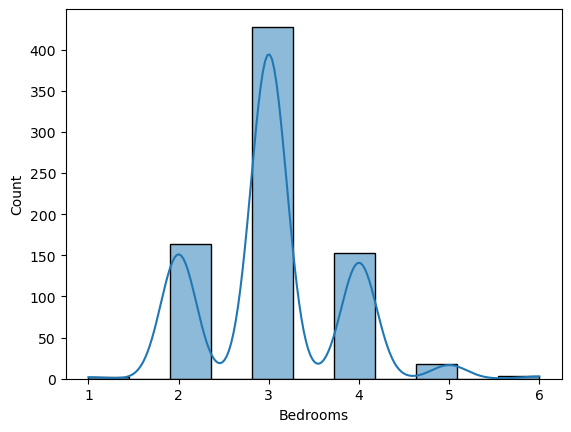

In [68]:
sns.histplot(df["Bedrooms"], kde= True)

0


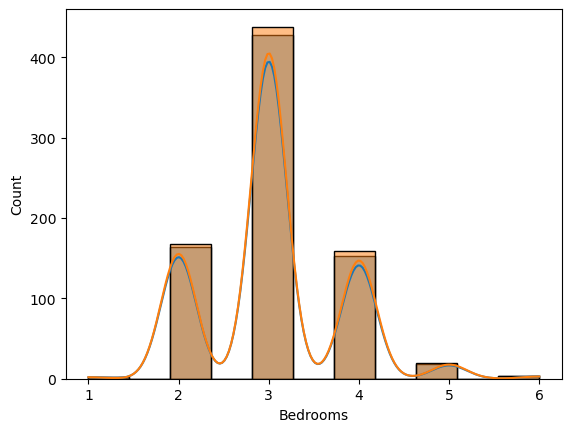

In [100]:
# Impute Bedrooms
data = df.copy()
np.random.seed(SEED)

data.loc[data["Bedrooms"].isna(), "Bedrooms"] = np.around(np.random.normal(data["Bedrooms"].mean(), data["Bedrooms"].std(), size = len(data.loc[data["Bedrooms"].isna(), "Bedrooms"] )))
print(data["Bedrooms"].isna().sum())

sns.histplot(df["Bedrooms"], kde= True)
sns.histplot(data["Bedrooms"], kde= True)
plt.show()

<Axes: xlabel='Stories', ylabel='Count'>

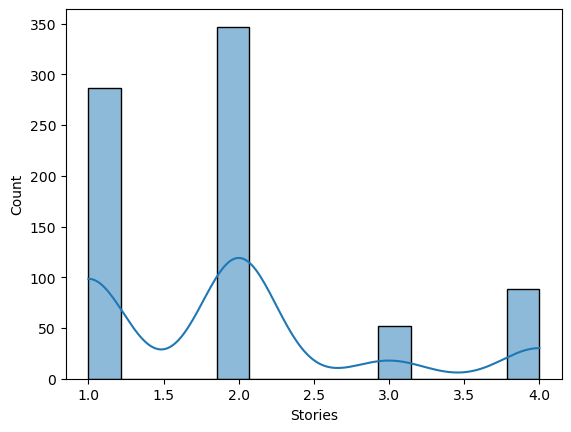

In [70]:
sns.histplot(df["Stories"], kde= True)

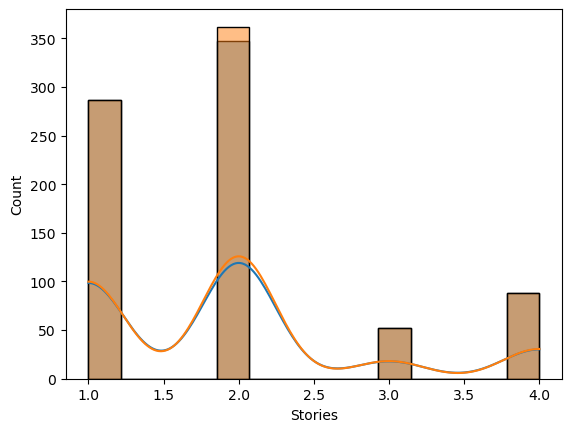

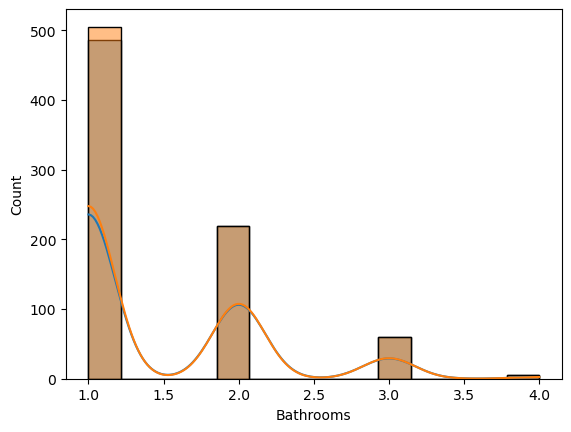

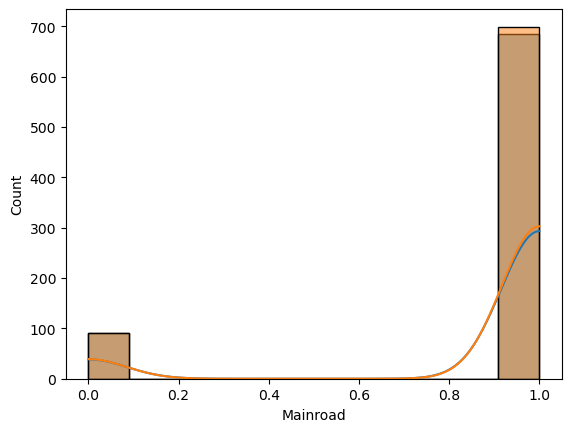

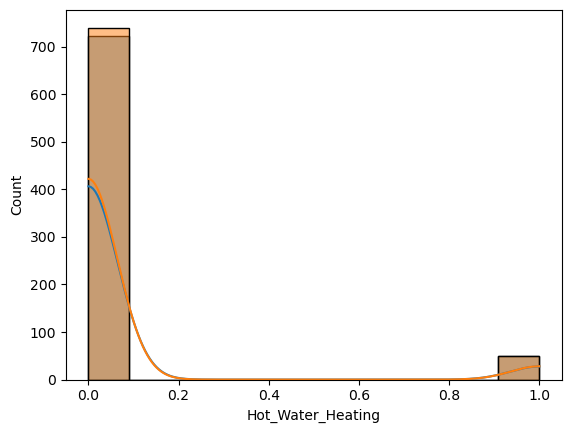

In [101]:
cols_to_mode_impute = ["Stories", "Bathrooms", "Mainroad", "Hot_Water_Heating"]

for col in cols_to_mode_impute:
    modeStories = data[col].mode()[0]

    data[col] = data[col].fillna(modeStories)
    sns.histplot(df[col], kde= True)
    sns.histplot(data[col], kde= True)
    plt.show()



<Axes: xlabel='Parking', ylabel='Count'>

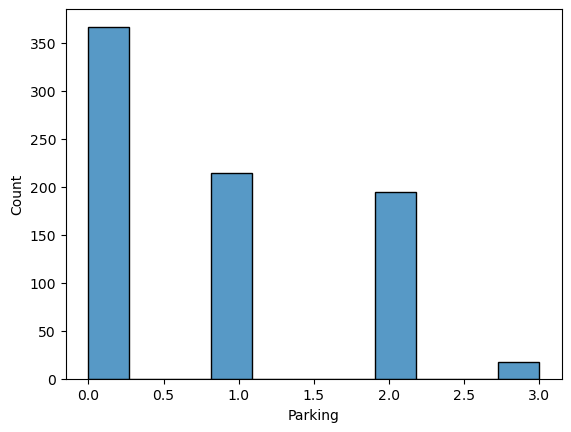

In [53]:
sns.histplot(df["Parking"])

In [103]:
# Impute Parking

from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(random_state= SEED)
X_train = pd.DataFrame(data.loc[data["Parking"].notna(), "Price"])
y_train = pd.DataFrame(data.loc[data["Parking"].notna(), "Parking"])

print(X_train.shape, y_train.shape)
X_test = pd.DataFrame(data.loc[data["Parking"].isna(), "Price"])
print(X_test)
model.fit(X_train, y_train)
data.loc[data["Parking"].isna(), "Parking"] = model.predict(X_test)

(773, 1) (773, 1)
          Price
14    8400000.0
79    8295000.0
98    6510000.0
108   4900000.0
131   5495000.0
239   7875000.0
277   3500000.0
345   4095000.0
396   3780000.0
441   5950000.0
458   3500000.0
502   3675000.0
739   3850000.0
766  12215000.0
790   5600000.0
797   6650000.0


C:\Users\thiba\AppData\Local\Temp\ipykernel_18856\1597323374.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


<Axes: xlabel='Parking', ylabel='Count'>

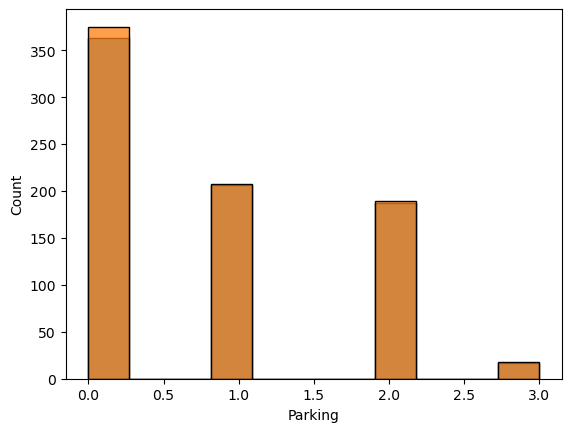

In [104]:
sns.histplot(df["Parking"])
sns.histplot(data["Parking"])

In [105]:
data.isna().sum()


Price                 0
Area                 13
Bedrooms              0
Bathrooms             0
Stories               0
Mainroad              0
Guestroom            20
Basement             21
Hot_Water_Heating     0
Air_Conditioning     13
Parking               0
Prefarea             13
Furnishing_Status    20
dtype: int64

In [110]:
# Imputation Area
import statsmodels.api as smf

dataprov = data.copy()

data_train = dataprov.dropna(subset = ["Area"])
model = smf.formula.ols(formula="Area ~ Price + Bedrooms + Bathrooms + Stories + Mainroad + Air_Conditioning + Parking + Prefarea ", data=data_train).fit()
print(model.summary())

for col in ["Bedrooms", "Bathrooms", "Stories", "Mainroad", "Air_Conditioning", "Parking", "Prefarea"]:
    dataprov[col].fillna(dataprov[col].median(), inplace = True)

x_miss = dataprov.loc[dataprov["Area"].isna() == True, ["Price","Bedrooms", "Bathrooms", "Stories", "Mainroad", "Air_Conditioning", "Parking", "Prefarea"]]
print(x_miss)

data.loc[data["Area"].isna() == True, "Area"] = model.predict(x_miss)

                            OLS Regression Results                            
Dep. Variable:                   Area   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     49.05
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           1.39e-63
Time:                        16:37:27   Log-Likelihood:                -6701.5
No. Observations:                 752   AIC:                         1.342e+04
Df Residuals:                     743   BIC:                         1.346e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2433.9105    335.309  

In [111]:
data.isna().sum()

Price                 0
Area                  0
Bedrooms              0
Bathrooms             0
Stories               0
Mainroad              0
Guestroom            20
Basement             21
Hot_Water_Heating     0
Air_Conditioning     13
Parking               0
Prefarea             13
Furnishing_Status    20
dtype: int64

<Axes: xlabel='Area', ylabel='Count'>

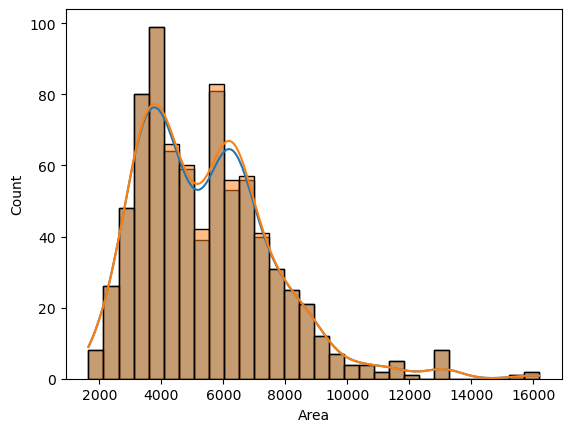

In [112]:
sns.histplot(df["Area"], bins=30, kde=True)
sns.histplot(data["Area"], bins=30, kde = True)

In [116]:
# Impute Guestroom

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


regressors = ['Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Mainroad',
                        'Hot_Water_Heating', 'Parking']
targets = ["Guestroom", "Basement", "Air_Conditioning", "Prefarea", "Furnishing_Status"]
for target in targets:

    model = RandomForestClassifier(random_state= SEED)
    X_train = pd.DataFrame(data.loc[data[target].notna(), regressors])
    y_train = pd.DataFrame(data.loc[data[target].notna(), target])

    X_test = pd.DataFrame(data.loc[data[target].isna(), regressors])
    model.fit(X_train, y_train)
    data.loc[data[target].isna(), target] = model.predict(X_test)

    regressors.append(target)



C:\Users\thiba\AppData\Local\Temp\ipykernel_18856\4124824071.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\thiba\AppData\Local\Temp\ipykernel_18856\4124824071.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\thiba\AppData\Local\Temp\ipykernel_18856\4124824071.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\thiba\AppData\Local\Temp\ipykernel_18856\4124824071.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_trai

In [118]:
data.isna().sum()

Price                0
Area                 0
Bedrooms             0
Bathrooms            0
Stories              0
Mainroad             0
Guestroom            0
Basement             0
Hot_Water_Heating    0
Air_Conditioning     0
Parking              0
Prefarea             0
Furnishing_Status    0
dtype: int64